In [1]:
import sys 
import numpy as np 
sys.path.append('/home/ak/Documents/Research/QFPaper/Code/')
import hmm 
import pandas as pd
import plotly
import plotly.plotly as py
#import seaborn as sns
from hmm import hmm_calibration
from observation_models import *
import matplotlib.pyplot as plt 
%matplotlib inline 
import copy
from copy import deepcopy as dcopy

prng = np.random.RandomState(10)
n_components = 3
startprob = prng.rand(n_components)
startprob = startprob / startprob.sum()
transmat = prng.rand(n_components, n_components) #random starting point
transmat /= np.tile(transmat.sum(axis=1)[:, np.newaxis], (1, n_components))#normalising so all entries sum up to 1

sigmas = [ .3, 0.8, 1][0:n_components]
lambdas = [0.5, 5., 0.8][0:n_components]
weights = [0, 0, 0][0:n_components]
priors = {'sigmas':[0.3, .85, 1.05][0:n_components], 'lambdas':[0.05, 0.9, 0.72][0:n_components], 
          'weights':[0.1, 0.02, 0.03][0:n_components], 
          'tpm': transmat, 'pi': startprob}

sample_size = 500
no_data_sets = 10 
#generate state and observation data from the \"right\" distribution\n",
states = hmm_calibration.sample_states(startprob, transmat, prng, sample_size = sample_size)
data_sets = [] 
for i in range(no_data_sets): 
    observation_data = Exp_UniGauss.sample_data(states,lambdas, sigmas, weights, 0, rng=prng)
    data_set = pd.DataFrame()
    data_set['tau'] = observation_data[0]
    data_set['price_change'] = observation_data[1]
    data_sets.append(data_set) 
    
    
#define the calibrator and model 
update_tag = 'sl'

obs_model = Exp_UniGauss(n_components, epsilon=0)
the_hmm = hmm_calibration(obs_model, n_components, max_iter=10) 
#result = the_hmm.run_hmm(data_set, update_tag=update_tag, initialise_method_tag=None, priors=priors, rng=prng)

In [4]:
lambdas_opt = []
sigmas_opt = []
    
for i in range(no_data_sets):
    ds = data_sets[i].iloc[0:100] 
    the_hmm.run_hmm(ds, update_tag=update_tag, initialise_method_tag=None, priors=priors, rng=prng)
    print the_hmm.obs_model_.sigma_
    lambdas_opt.append(the_hmm.obs_model_.lambdas_[:])
    sigmas_opt.append(the_hmm.obs_model_.sigma_[:])

               
        
        

[0.13248238130580517, 0.72644817116799543, 0.7818749289060043]
[0.19361941021738419, 0.7837653417556304, 0.80234047964556787]
[0.43780719365332338, 0.76756640658657371, 0.93034927733013484]
[0.25881545818392082, 0.80868177232797167, 1.0586340719082297]
[0.29739656354351396, 0.76088478869392751, 0.65969030236481663]
[0.24353509488375683, 0.93336383020122493, 1.0030352959797282]
[0.25970505652197101, 0.82153614647498063, 1.0526904210072217]
[0.15377298924520996, 0.66526373022037999, 0.81890831911266981]
[0.21149055356474958, 0.89738902850338165, 0.87115478121792267]
[0.24288541694892965, 0.83497069624668974, 0.86069445302970615]


In [5]:
lambdas_opt = [] 
sigmas_opt = [] 
for j in range(1,5):
    for i in range(no_data_sets): 
        ds = data_sets[i].iloc[0:j*100] 
        the_hmm.run_hmm(ds, update_tag=update_tag, initialise_method_tag=None, priors=priors, rng=prng)
        lambdas_opt.append(the_hmm.obs_model_.lambdas_[:])
        sigmas_opt.append(the_hmm.obs_model_.sigma_[:]) 



In [83]:
sigmas_opt

[[0.12764817171361112, 0.72889925540921363, 0.77471610093098475],
 [0.19361222451957363, 0.78376997424580663, 0.80232691827281122],
 [0.4378063377591162, 0.76756647624012875, 0.93034924393635421],
 [0.25881540702780004, 0.80868177111218831, 1.0586340406898394],
 [0.29739656135500109, 0.76088478939976867, 0.65969030084239721],
 [0.24353509517194472, 0.93336383036174997, 1.0030352959212208],
 [0.25970505652259029, 0.82153614647459172, 1.05269042100844],
 [0.15377298924524843, 0.66526373022038177, 0.81890831911268669],
 [0.21149055356475044, 0.89738902850338098, 0.87115478121792667],
 [0.24288541694892979, 0.83497069624669051, 0.86069445302970549],
 [0.24738903576994759, 0.68903910977452276, 0.8753502275705608],
 [0.17756226628537122, 0.84116479651810228, 0.70667980400132713],
 [0.20705795928048057, 0.88125203901556748, 0.89948810155271741],
 [0.22148506350582978, 0.74984162126959741, 0.99210775015916564],
 [0.28642284025187387, 0.73327537325875991, 0.74034356071304463],
 [0.2263089470601

In [6]:
sigmas_diff_sqr =(pd.DataFrame(sigmas_opt)-sigmas)**2
lambdas_diff_sqr =(pd.DataFrame(lambdas_opt)-lambdas)**2



In [7]:

#####
#for i in range(no_data_sets): 
 #   results =pd.DataFrame()
    #  results_2=pd.DataFrame()
    # ds = data_sets[i].iloc[0:100] 
    # the_hmm.run_hmm(ds, update_tag=update_tag, initialise_method_tag=None, priors=priors, rng=prng)
    # print the_hmm.obs_model_.sigma_
    # results_2 +=results.append(the_hmm.obs_model_.sigma_)
####    
MSE=pd.DataFrame()

type(np.matrix(sigmas)[:,0]- np.mean(np.matrix(sigmas_opt)[:,0])) 
xx =lambdas_diff_sqr[0:10][1]
yy =lambdas_diff_sqr[0:30][1]
np.average(xx)
np.average(yy)

0.79953234231664139

In [11]:
lambdas_mse_1 =np.average(lambdas_diff_sqr[0:10][0])
lambdas_mse_2 =np.average(lambdas_diff_sqr[0:20][0])
lambdas_mse_3 =np.average(lambdas_diff_sqr[0:30][0])
lambdas_mse_4 =np.average(lambdas_diff_sqr[0:39][0])

In [9]:
mse_1

0.060501387846887009

In [10]:
mse_2

0.039479096618052142

In [12]:
len(lambdas_diff_sqr)

40

In [69]:
sigmas_mse_array=np.zeros((3,4))

for j in range(0, 3):
    for i in range(1, 5):
        sigmas_mse=np.average(sigmas_diff_sqr.iloc[0:i*10-1,0+j])
        sigmas_mse_array[j,i-1] = sigmas_mse
        
print(sigmas_mse_array)


[[ 0.01063836  0.00838326  0.00681194  0.00575084]
 [ 0.00598492  0.005703    0.00507708  0.00432127]
 [ 0.02956757  0.03636832  0.0347516   0.03131533]]


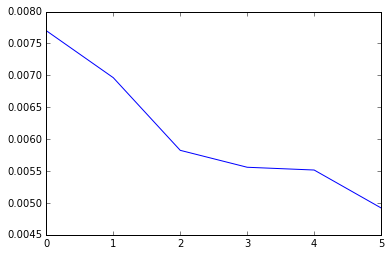

In [43]:
plt.plot(sigmas_mse_array)

In [51]:
np.average(sigmas_diff_sqr[0])

0.0056847033286921362

In [52]:
np.average(sigmas_diff_sqr[1])

0.0042147775983805685

In [74]:
sigmas_mse_array= pd.DataFrame(np.transpose(sigmas_mse_array))

{'boxes': [<matplotlib.lines.Line2D at 0x7fd3daae9bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3daa07ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3daa1cdd0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd3daa1c790>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd3daae9d90>,
  <matplotlib.lines.Line2D at 0x7fd3daaa3910>]}

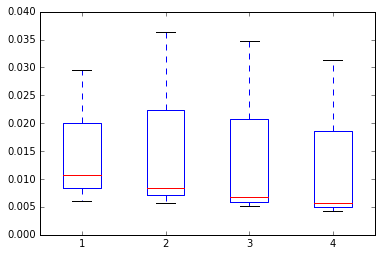

In [82]:
plt.boxplot(sigmas_mse_array.values)

In [85]:
data_sets[1].iloc[0:100]

,tau,price_change
0,2.277343,0.209924
1,0.157959,-0.492057
2,0.084948,0.950510
3,0.193056,-0.045716
4,0.132256,0.585659
5,0.012035,1.285463
6,0.062475,0.649570
7,0.343721,-0.420100
8,3.095625,0.967119
9,0.092524,0.653113
